In [1]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
from matplotlib.dates import DateFormatter
from datetime import datetime as dt

In [8]:
root = './'
auxdata = root+"auxdata/"

In [9]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Fig 2B

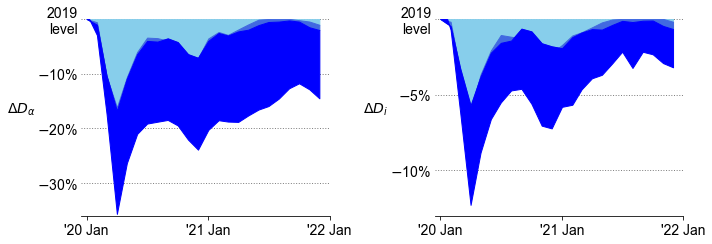

In [10]:
df = pd.read_csv(root+"fig2/fig2B.csv")   

fig,ax = plt.subplots(1,2,figsize=(10,3.5))
for i,(seglab,typ,ymin,yticks,yticklabels,ymin) in enumerate(zip([r"$\Delta D_{\alpha}$",r"$\Delta D_i$"],['pseg','useg'],
                                             [0.48,0.275],[[-30,-20,-10,0],[-10,-5,0]],
                                                    [[r"$\minus$30%",r"$\minus$20%",r"$\minus$10%","2019\nlevel"],
                                                     [r"$\minus$10%",r"$\minus$5%","2019\nlevel"]], [-36,-13])):    
    bef = np.repeat(0, 24)
    for j,(mode,col,nom) in enumerate(zip(['weakcounterfac', 'counterfac', 'actual'],['skyblue','royalblue','b'],
                                          ["(i) Reduced activities by income",'(ii) Changes in activity mix',
                                           '(iii) Changes in place preferences',"2019 Baseline"])):
        this = df[(df["mode"]==mode)&(df['type']==typ)]
        this["date"] = pd.to_datetime(this["date"])
        res = this['value'].values
        if i==1:
            nom=None
        ax[i].fill_between(this.date, bef, res, label=nom, color=col, zorder=5)
        bef = res
    
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].xaxis.set_major_formatter(DateFormatter('%Y/%m'))
    ax[i].set_ylabel(seglab, fontsize=14, rotation=0, labelpad=15)
    ax[i].set_xticks(["2020-01-01","2021-01-01","2022-01-01"])
    ax[i].set_xticklabels(["'20 Jan","'21 Jan","'22 Jan"], fontsize=14, family='Arial')    
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(yticklabels, fontsize=14, family='Arial')
    ax[i].set_xlim(dt.strptime("2019-12-15","%Y-%m-%d"), dt.strptime("2022-01-01","%Y-%m-%d"))
    ax[i].set_ylim(ymin,0)
    ax[i].tick_params(axis=u'y', which=u'both',length=0)
    for yla in yticks:
        ax[i].axhline(yla, linestyle=':', linewidth=1, color='gray', zorder=1)
        
plt.tight_layout()
plt.show()    

# Fig 2C

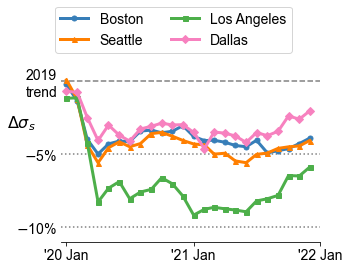

In [6]:
df = pd.read_csv(root+"fig2/fig2C.csv")
df['date'] = pd.to_datetime(df['date'])

fig,ax = plt.subplots(figsize=(5,3))
hlab = "2019 trend"

for i,(city_name,lab,col,mark) in enumerate(zip(['boston','seattle','la','dallas'], ["Boston","Seattle",'Los Angeles','Dallas'],
                                      [CB_color_cycle[0],CB_color_cycle[1],CB_color_cycle[2],CB_color_cycle[3]],
                                      ["o","^",'s',"D"])):
    this = df[df['city']==city_name]
    ax.plot(this.date, this.value, label=lab, color=col, linestyle='-', linewidth=3, marker=mark, markersize=5, zorder=5)

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))
ax.set_ylabel(r'$\Delta \sigma_s$', fontsize=16, rotation=0, labelpad=10, y=.75)
ax.yaxis.set_label_coords(-0.15,.65)
ax.set_xticks(["2020-01-01","2021-01-01","2022-01-01"])
ax.set_xticklabels(["'20 Jan","'21 Jan","'22 Jan"], fontsize=14, family='Arial')
ax.set_yticks([0,-.05,-.1])
ax.set_yticklabels(['2019\ntrend','$\minus$5%','$\minus$10%'], fontsize=14, family='Arial')
for y,sty in zip([0,-.05,-.1],["--",":",":"]):
    ax.axhline(y, linestyle=sty, color='gray', zorder=1)
ax.set_xlim(dt.strptime("2019-12-15","%Y-%m-%d"), dt.strptime("2022-01-01","%Y-%m-%d"))
ax.set_ylim(-.11)
ax.tick_params(axis=u'y', which=u'both',length=0)
fig.legend(ncol=2, loc="lower center", bbox_to_anchor=(.5,.99), fontsize=14)
plt.tight_layout()
plt.show()    

# Fig 2D

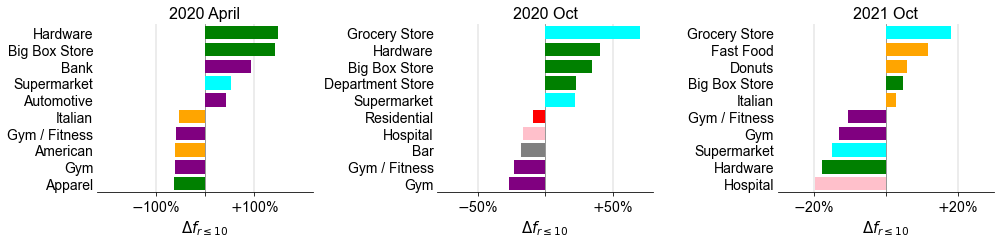

In [13]:
fig,ax = plt.subplots(1,3,figsize=(14,3.5))
for i,(d,title,xlim,xtick) in enumerate(zip(['2020-04-01','2020-10-01','2021-10-01'],
                                      ['2020 April','2020 Oct','2021 Oct'],
                                      [220,80,30],[100,50,20])):
    toplot = pd.read_csv(root+"fig2/fig2D_"+d+".csv")
    for y,hei,col in zip(toplot["num"].values,toplot[d+"_diff"].values,toplot['color'].values):
        thismin = np.min((0,hei))
        thismax = np.max((0,hei))
        ax[i].barh(y=y, left=thismin, width=np.abs(hei), height=.8, color=col, zorder=5)#, facecolor=toplot['color'], edgecolor=toplot['color'], zorder=5, s=80)

    ax[i].set_yticks(np.arange(len(toplot)))
    ax[i].set_yticklabels(toplot["index"], fontsize=14)
    ax[i].axvline(0, color='gray', linewidth=.8)
    ax[i].axvline(-xtick, color='gray', linewidth=.3)
    ax[i].axvline(xtick, color='gray', linewidth=.3)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlabel(r"$\Delta f_{r\leq 10}$",fontsize=15)
    ax[i].set_title(title,fontsize=16)
    ax[i].set_xlim(-xlim,xlim)
    ax[i].set_ylim(-.5,9.5)
    ax[i].set_xticks([-xtick,0,xtick])
    ax[i].set_xticklabels(["$\minus$"+str(xtick)+"%","","$\plus$"+str(xtick)+"%"], fontsize=14)
    ax[i].invert_yaxis()
    ax[i].tick_params(axis=u'y', which=u'both',length=0)
plt.tight_layout()
plt.show()